<a href="https://colab.research.google.com/github/Hasninemamud/News-artical-classification/blob/main/project_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import string
import nltk
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/bbc-news-data.csv', delimiter='\t')
df.head()

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...


In [ ]:
df['content'][1]

' The dollar has hit its highest level against the euro in almost three months after the Federal Reserve head said the US trade deficit is set to stabilise.  And Alan Greenspan highlighted the US government\'s willingness to curb spending and rising household savings as factors which may help to reduce it. In late trading in New York, the dollar reached $1.2871 against the euro, from $1.2974 on Thursday. Market concerns about the deficit has hit the greenback in recent months. On Friday, Federal Reserve chairman Mr Greenspan\'s speech in London ahead of the meeting of G7 finance ministers sent the dollar higher after it had earlier tumbled on the back of worse-than-expected US jobs data. "I think the chairman\'s taking a much more sanguine view on the current account deficit than he\'s taken for some time," said Robert Sinche, head of currency strategy at Bank of America in New York. "He\'s taking a longer-term view, laying out a set of conditions under which the current account defici

In [ ]:
df['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

In [ ]:
df.isnull().sum()

category    0
filename    0
title       0
content     0
dtype: int64

***Text Preprocessing***

In [ ]:
df['content'] = df['content'].str.lower()
df['content'][1]

' the dollar has hit its highest level against the euro in almost three months after the federal reserve head said the us trade deficit is set to stabilise.  and alan greenspan highlighted the us government\'s willingness to curb spending and rising household savings as factors which may help to reduce it. in late trading in new york, the dollar reached $1.2871 against the euro, from $1.2974 on thursday. market concerns about the deficit has hit the greenback in recent months. on friday, federal reserve chairman mr greenspan\'s speech in london ahead of the meeting of g7 finance ministers sent the dollar higher after it had earlier tumbled on the back of worse-than-expected us jobs data. "i think the chairman\'s taking a much more sanguine view on the current account deficit than he\'s taken for some time," said robert sinche, head of currency strategy at bank of america in new york. "he\'s taking a longer-term view, laying out a set of conditions under which the current account defici

In [ ]:
exclude = string.punctuation
def remove_punc(text):
  return text.translate(str.maketrans('', '', exclude))
df['content'] = df['content'].apply(remove_punc)
df['content'][1]

' the dollar has hit its highest level against the euro in almost three months after the federal reserve head said the us trade deficit is set to stabilise  and alan greenspan highlighted the us governments willingness to curb spending and rising household savings as factors which may help to reduce it in late trading in new york the dollar reached 12871 against the euro from 12974 on thursday market concerns about the deficit has hit the greenback in recent months on friday federal reserve chairman mr greenspans speech in london ahead of the meeting of g7 finance ministers sent the dollar higher after it had earlier tumbled on the back of worsethanexpected us jobs data i think the chairmans taking a much more sanguine view on the current account deficit than hes taken for some time said robert sinche head of currency strategy at bank of america in new york hes taking a longerterm view laying out a set of conditions under which the current account deficit can improve this year and next

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
def remove_stopwords(text):
  new_text = []
  for word in text.split():
    if word in stopwords.words('english'):
      new_text.append('')
    else:
      new_text.append(word)
  x = new_text[:]
  new_text.clear()
  return " ".join(x)

df['content'] = df['content'].apply(remove_stopwords)

In [ ]:
df['content'][2]

' owners  embattled russian oil giant yukos   ask  buyer   former production unit  pay back  900m £479m loan stateowned rosneft bought  yugansk unit  93bn   sale forced  russia  part settle  275bn tax claim  yukos yukos owner menatep group says   ask rosneft  repay  loan  yugansk  secured   assets rosneft already faces  similar 540m repayment demand  foreign banks legal experts said rosnefts purchase  yugansk would include  obligations  pledged assets   rosneft      pay real money   creditors  avoid seizure  yugansk assets said moscowbased us lawyer jamie firestone    connected   case menatep groups managing director tim osborne told  reuters news agency   default   fight    rule  law exists   international arbitration clauses   credit rosneft officials  unavailable  comment   company  said  intends  take action  menatep  recover    tax claims  debts owed  yugansk yukos  filed  bankruptcy protection   us court   attempt  prevent  forced sale   main production arm  sale went ahead  dece

**Feature Extraction**

In [ ]:
X = df.iloc[:, 3:4]
Y = df['category']

In [ ]:
X

,content
0,quarterly profits us media giant timewarner j...
1,dollar hit highest level euro almost thr...
2,owners embattled russian oil giant yukos a...
3,british airways blamed high fuel prices 40 ...
4,shares uk drinks food firm allied domecq ri...
...,...
2220,bt introducing two initiatives help beat rog...
2221,computer users across world continue ignore ...
2222,new european directive could put software wri...
2223,man making sure us computer networks safe s...


In [ ]:
Y

0       business
1       business
2       business
3       business
4       business
          ...   
2220        tech
2221        tech
2222        tech
2223        tech
2224        tech
Name: category, Length: 2225, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Y = encoder.fit_transform(Y)

In [ ]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, train_size = 0.8, random_state = 20)


In [ ]:
print(X_train.shape)
print(X_test.shape)

(1780, 1)
(445, 1)


**Bag of Words**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
X_train_bow = cv.fit_transform(X_train['content']).toarray()
X_test_bow = cv.transform(X_test['content']).toarray()

In [ ]:
# np.set_printoptions(threshold=np.inf)
# X_train_bow[900]
X_train_bow.shape

(1780, 30758)

**TF-IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

In [ ]:
X_train_tfidf = tfidf.fit_transform(X_train['content']).toarray()
X_test_tfidf = tfidf.transform(X_test['content']).toarray()

In [ ]:
np.set_printoptions(threshold=np.inf)
X_train_tfidf[900]
# X_train_tfidf.shape

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

**KNN**

In [ ]:
knn_bow = KNeighborsClassifier(n_neighbors = 5)
knn_bow.fit(X_train_bow, Y_train)
y_pred_knn_bow = knn_bow.predict(X_test_bow)
print(accuracy_score(Y_test, y_pred_knn_bow)*100)

57.30337078651685


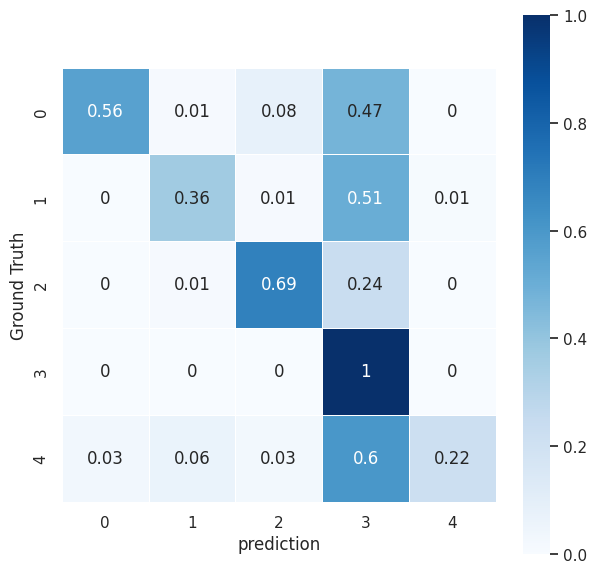

In [ ]:
sns.set()
cm = confusion_matrix(Y_test, y_pred_knn_bow)
cm = cm.astype('float')/ cm.sum(axis=1)[: np.newaxis]
annot = np.around(cm, 2)

fig, ax = plt.subplots(figsize = (7, 7))
sns.heatmap(cm, cmap = 'Blues', annot = annot, lw = 0.5)
ax.set_xlabel("prediction")
ax.set_ylabel('Ground Truth')
ax.set_aspect('equal')

In [ ]:
knn_tfidf = KNeighborsClassifier(n_neighbors = 5)
knn_tfidf.fit(X_train_tfidf, Y_train)
y_pred_knn_tfidf = knn_tfidf.predict(X_test_tfidf)
print(accuracy_score(Y_test, y_pred_knn_tfidf)*100)

93.25842696629213


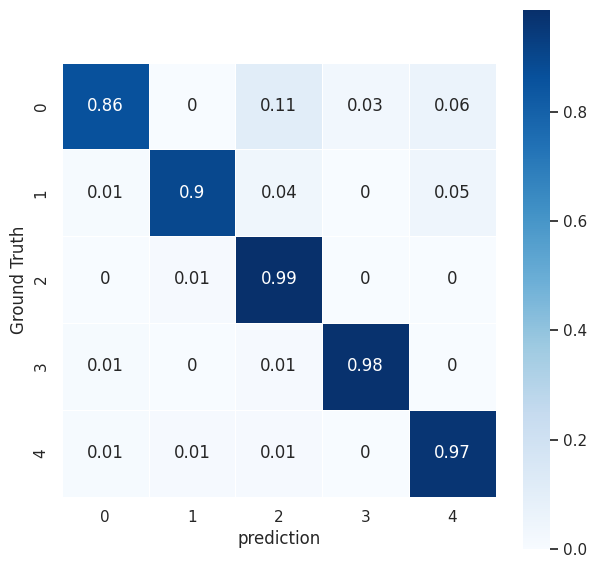

In [ ]:
sns.set()
cm = confusion_matrix(Y_test, y_pred_knn_tfidf)
cm = cm.astype('float')/ cm.sum(axis=1)[: np.newaxis]
annot = np.around(cm, 2)

fig, ax = plt.subplots(figsize = (7, 7))
sns.heatmap(cm, cmap = 'Blues', annot = annot, lw = 0.5)
ax.set_xlabel("prediction")
ax.set_ylabel('Ground Truth')
ax.set_aspect('equal')

**Naive Bayes**

In [ ]:
nb_bow = MultinomialNB()
nb_bow.fit(X_train_bow, Y_train)
y_pred_nb_bow = nb_bow.predict(X_test_bow)
print(accuracy_score(Y_test, y_pred_nb_bow)*100)

97.07865168539325


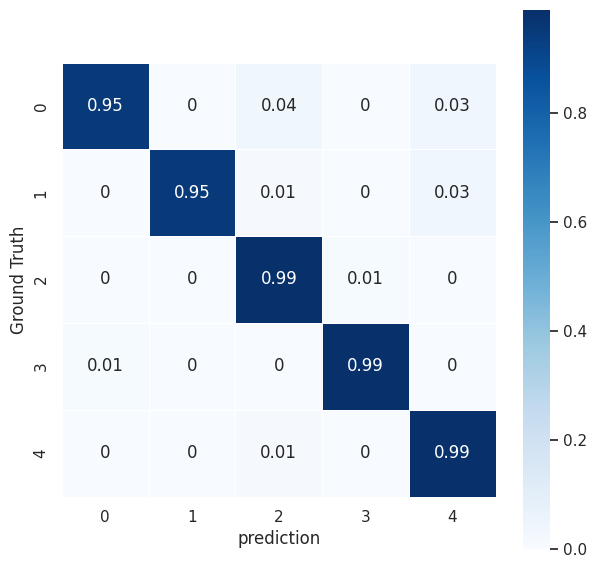

In [ ]:
sns.set()
cm = confusion_matrix(Y_test, y_pred_nb_bow)
cm = cm.astype('float')/ cm.sum(axis=1)[: np.newaxis]
annot = np.around(cm, 2)

fig, ax = plt.subplots(figsize = (7, 7))
sns.heatmap(cm, cmap = 'Blues', annot = annot, lw = 0.5)
ax.set_xlabel("prediction")
ax.set_ylabel('Ground Truth')
ax.set_aspect('equal')

In [ ]:
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, Y_train)
y_pred_nb_tfidf = nb_tfidf.predict(X_test_tfidf)
print(accuracy_score(Y_test, y_pred_nb_tfidf)*100)

95.28089887640449


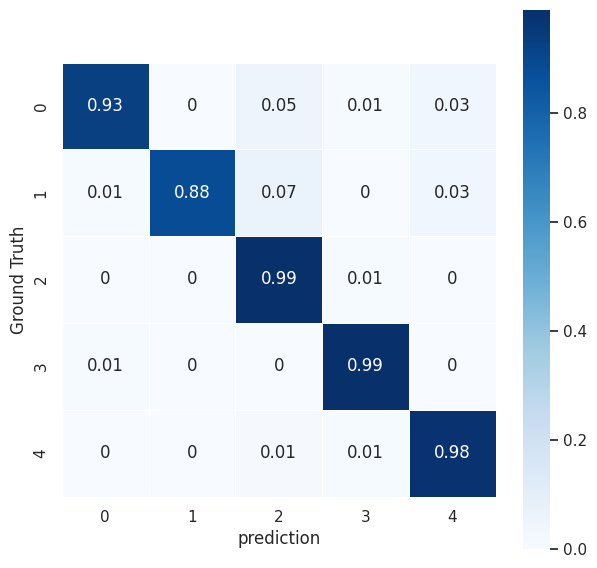

In [ ]:
sns.set()
cm = confusion_matrix(Y_test, y_pred_nb_tfidf)
cm = cm.astype('float')/ cm.sum(axis=1)[: np.newaxis]
annot = np.around(cm, 2)

fig, ax = plt.subplots(figsize = (7, 7))
sns.heatmap(cm, cmap = 'Blues', annot = annot, lw = 0.5)
ax.set_xlabel("prediction")
ax.set_ylabel('Ground Truth')
ax.set_aspect('equal')

**Decision Tree**

In [ ]:
dt_bow = DecisionTreeClassifier(criterion='entropy')
dt_bow.fit(X_train_bow, Y_train)
y_pred_dt_bow = dt_bow.predict(X_test_bow)
print(accuracy_score(Y_test, y_pred_dt_bow)*100)

84.04494382022472


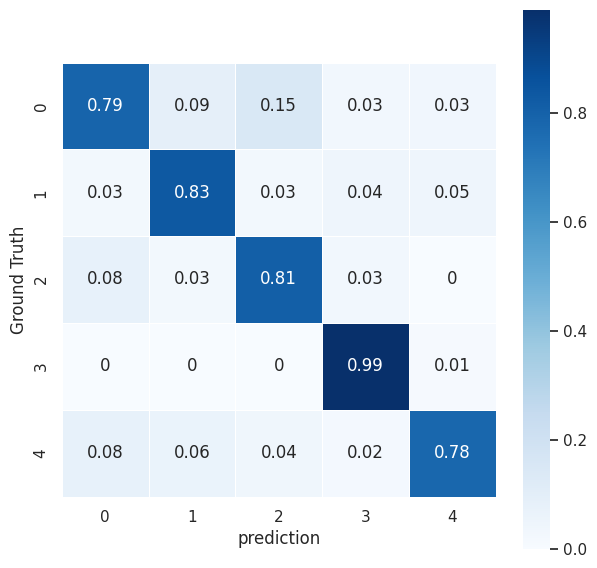

In [ ]:
sns.set()
cm = confusion_matrix(Y_test, y_pred_dt_bow)
cm = cm.astype('float')/ cm.sum(axis=1)[: np.newaxis]
annot = np.around(cm, 2)

fig, ax = plt.subplots(figsize = (7, 7))
sns.heatmap(cm, cmap = 'Blues', annot = annot, lw = 0.5)
ax.set_xlabel("prediction")
ax.set_ylabel('Ground Truth')
ax.set_aspect('equal')

In [ ]:
dt_tfidf = DecisionTreeClassifier(criterion='entropy')
dt_tfidf.fit(X_train_tfidf, Y_train)
y_pred_dt_tfidf = dt_tfidf.predict(X_test_tfidf)
print(accuracy_score(Y_test, y_pred_dt_tfidf)*100)

80.0


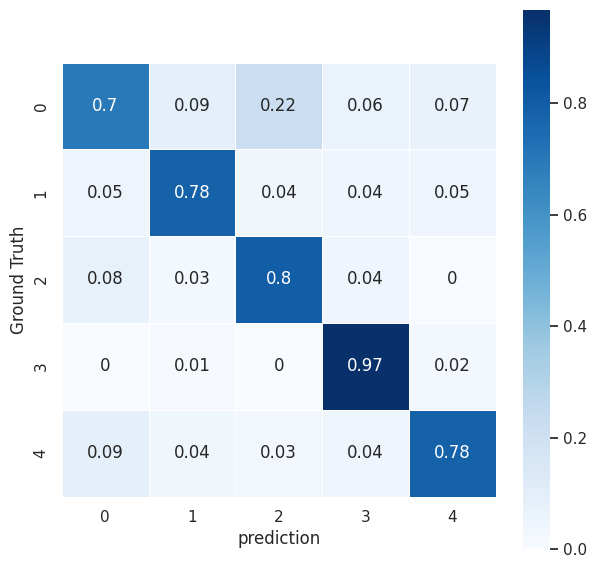

In [ ]:
sns.set()
cm = confusion_matrix(Y_test, y_pred_dt_tfidf)
cm = cm.astype('float')/ cm.sum(axis=1)[: np.newaxis]
annot = np.around(cm, 2)

fig, ax = plt.subplots(figsize = (7, 7))
sns.heatmap(cm, cmap = 'Blues', annot = annot, lw = 0.5)
ax.set_xlabel("prediction")
ax.set_ylabel('Ground Truth')
ax.set_aspect('equal')

**Cosine Similarity**

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarities = cosine_similarity([X_test_tfidf[3]], X_train_tfidf)
max_similarity_index = cosine_similarities.argmax()
max_similarity = cosine_similarities[0][max_similarity_index]
print(max_similarity)

0.39289659347798905


In [ ]:
cosine_similarities = cosine_similarity([X_test_bow[3]], X_train_bow)
max_similarity_index = cosine_similarities.argmax()
max_similarity = cosine_similarities[0][max_similarity_index]
print(max_similarity)

0.5622647255648842
